<a href="https://colab.research.google.com/github/ttderessa/Temesgen-Deressa/blob/main/Logistic_Regression_Models_in_Automobile_Credit_Default_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Title: Advanced Coding for Data Cleaning, Preprocessing, and Evaluation of Logistic Regression Models in Automobile Credit Default Analysis


This script handles advanced coding techniques for data cleaning, preprocessing, and evaluation of logistic regression models for automobile credit default analysis. It begins by optimizing memory usage in the dataset, converting numeric columns to more efficient types, and then cleans the data by replacing 'x' values. Categorical columns are encoded using LabelEncoder to transform them into numerical values. Missing data is managed by dropping columns with all NaN values and applying iterative imputation to fill the gaps. The script includes a function to plot confusion matrices for visual evaluation of model performance. The main function, logistic_regression_comparison, trains and compares multiple logistic regression models, assessing their accuracy, precision, recall, and F1 scores, with cross-validation. It also performs hyperparameter tuning using RandomizedSearchCV and compares models with and without cross-validation. The script processes the AutoCredit.csv dataset, which is used for automobile credit default analysis, scales the features, and evaluates the models. Support from ChatGPT was used to compile and refine the code.

Missing values after imputation: 0
Logistic Regression Accuracy: 0.7386344986049566

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.97      0.74      0.84     22425
         1.0       0.19      0.72      0.31      1947

    accuracy                           0.74     24372
   macro avg       0.58      0.73      0.57     24372
weighted avg       0.91      0.74      0.80     24372



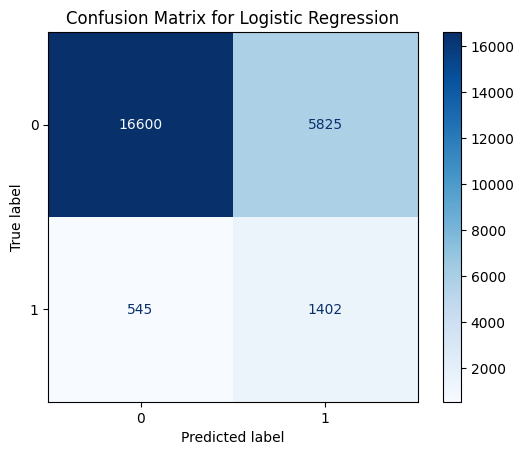

Cross-validation Scores: [0.74158871 0.73542325 0.74038817 0.7362439  0.73521809]
Mean Cross-Validation Accuracy: 0.7377724214130865


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


Randomized Search CV Accuracy: 0.7402346955522731
Classification Report for Randomized Search CV:
              precision    recall  f1-score   support

         0.0       0.97      0.74      0.84     22425
         1.0       0.20      0.72      0.31      1947

    accuracy                           0.74     24372
   macro avg       0.58      0.73      0.57     24372
weighted avg       0.91      0.74      0.80     24372



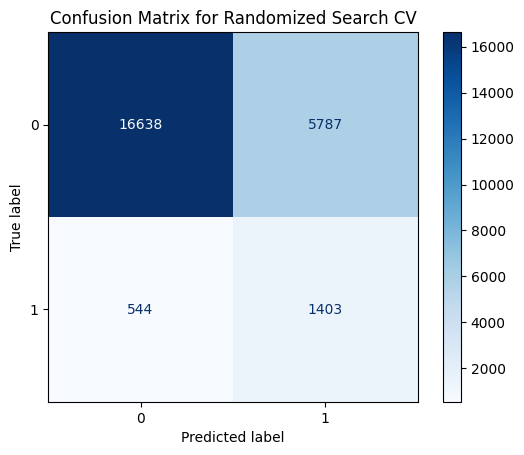

Logistic Regression CV Accuracy: 0.7401936648613162
Classification Report for Logistic Regression CV:
              precision    recall  f1-score   support

         0.0       0.97      0.74      0.84     22425
         1.0       0.20      0.72      0.31      1947

    accuracy                           0.74     24372
   macro avg       0.58      0.73      0.57     24372
weighted avg       0.91      0.74      0.80     24372



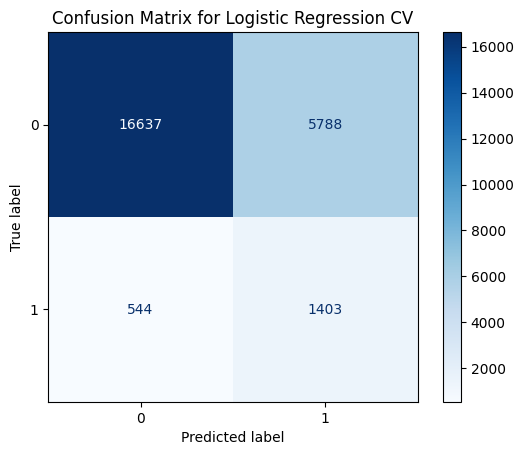


Model Outcomes:
                        Accuracy Precision Recall F1 Score
Logistic Regression     0.738634       N/A    N/A      N/A
Randomized Search CV    0.740235       N/A    N/A      N/A
Logistic Regression CV  0.740194       N/A    N/A      N/A


In [1]:
# Importing Libraries for Advanced Data Cleaning, Preprocessing, and Logistic Regression Model Evaluation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Optimize memory usage
def optimize_memory_usage(df):
    for col in df.select_dtypes(include=['float']):
        df[col] = pd.to_numeric(df[col], downcast='float', errors='coerce')
    for col in df.select_dtypes(include=['int']):
        df[col] = pd.to_numeric(df[col], downcast='integer', errors='coerce')
    for col in df.select_dtypes(include=['object']):
        df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

# Clean data sets
def clean_data(df):
    df = df.replace('x', '', regex=True)
    return df

# Encode categorical columns
def encode_categorical_columns(df):
    le = LabelEncoder()
    for col in df.select_dtypes(include=['object']).columns:
        try:
            df[col] = le.fit_transform(df[col])
        except:
            df[col] = df[col].astype('category').cat.codes
    return df

# Drop columns with all NaN values and handle missing data with iterative imputation
def drop_and_impute(df):
    df = df.dropna(axis=1, how='all')
    imputer = IterativeImputer()
    imputed_array = imputer.fit_transform(df)
    imputed_df = pd.DataFrame(imputed_array, columns=df.columns)
    print(f"Missing values after imputation: {imputed_df.isna().sum().sum()}")
    return imputed_df

# Plot confusion matrices
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

# Logistic regression with cross-validation and feature importance
def logistic_regression_comparison(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    results = {}

    try:
        # Logistic Regression
        lr = LogisticRegression(solver='saga', max_iter=100000, class_weight='balanced', n_jobs=-1)
        lr.fit(X_train, y_train)
        y_pred_lr = lr.predict(X_test)
        accuracy_lr = accuracy_score(y_test, y_pred_lr)
        report_lr = classification_report(y_test, y_pred_lr, output_dict=True)

        results['Logistic Regression'] = {
            'Accuracy': accuracy_lr,
            'Precision': report_lr['1']['precision'] if '1' in report_lr else 'N/A',
            'Recall': report_lr['1']['recall'] if '1' in report_lr else 'N/A',
            'F1 Score': report_lr['1']['f1-score'] if '1' in report_lr else 'N/A'
        }

        print("Logistic Regression Accuracy:", accuracy_lr)
        print("\nClassification Report for Logistic Regression:")
        print(classification_report(y_test, y_pred_lr))

        plot_confusion_matrix(y_test, y_pred_lr, 'Logistic Regression')

        # Cross-validation accuracy
        cv_scores = cross_val_score(lr, X, y, cv=5, n_jobs=-1)
        print("Cross-validation Scores:", cv_scores)
        print("Mean Cross-Validation Accuracy:", np.mean(cv_scores))

        # Hyperparameter tuning with Randomized Search
        param_dist = {
            'C': np.logspace(-4, 4, 50),
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear', 'saga']
        }
        rand_search = RandomizedSearchCV(lr, param_distributions=param_dist, n_iter=30, cv=5, random_state=42, n_jobs=-1)
        rand_search.fit(X_train, y_train)
        y_pred_rand = rand_search.predict(X_test)
        accuracy_rand = accuracy_score(y_test, y_pred_rand)
        report_rand = classification_report(y_test, y_pred_rand, output_dict=True)

        results['Randomized Search CV'] = {
            'Accuracy': accuracy_rand,
            'Precision': report_rand['1']['precision'] if '1' in report_rand else 'N/A',
            'Recall': report_rand['1']['recall'] if '1' in report_rand else 'N/A',
            'F1 Score': report_rand['1']['f1-score'] if '1' in report_rand else 'N/A'
        }

        print("Randomized Search CV Accuracy:", accuracy_rand)
        print("Classification Report for Randomized Search CV:")
        print(classification_report(y_test, y_pred_rand))

        plot_confusion_matrix(y_test, y_pred_rand, 'Randomized Search CV')

        # Logistic Regression with Cross-Validation (LogisticRegressionCV)
        lr_cv = LogisticRegressionCV(cv=5, penalty='l2', solver='lbfgs', class_weight='balanced')
        lr_cv.fit(X_train, y_train)
        y_pred_lr_cv = lr_cv.predict(X_test)
        accuracy_lr_cv = accuracy_score(y_test, y_pred_lr_cv)
        report_lr_cv = classification_report(y_test, y_pred_lr_cv, output_dict=True)

        results['Logistic Regression CV'] = {
            'Accuracy': accuracy_lr_cv,
            'Precision': report_lr_cv['1']['precision'] if '1' in report_lr_cv else 'N/A',
            'Recall': report_lr_cv['1']['recall'] if '1' in report_lr_cv else 'N/A',
            'F1 Score': report_lr_cv['1']['f1-score'] if '1' in report_lr_cv else 'N/A'
        }

        print("Logistic Regression CV Accuracy:", accuracy_lr_cv)
        print("Classification Report for Logistic Regression CV:")
        print(classification_report(y_test, y_pred_lr_cv))

        plot_confusion_matrix(y_test, y_pred_lr_cv, 'Logistic Regression CV')

    except Exception as e:
        print(f"An error occurred during logistic regression comparison: {e}")

    return results

# Main execution block
if __name__ == "__main__":
    df = pd.read_csv('/content/AutoCredit.csv', low_memory=False)
    df = clean_data(df)
    df = optimize_memory_usage(df)
    df = encode_categorical_columns(df)

    # Apply drop_and_impute to handle missing values
    df = drop_and_impute(df)

    y = df['Default']  # Target variable
    X = pd.get_dummies(df.drop(columns=['Default']), drop_first=True)

    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Get model comparison results
    results = logistic_regression_comparison(X_scaled, y)

    # Convert results to DataFrame for easier comparison
    results_df = pd.DataFrame(results).T

    # Display the results table
    print("\nModel Outcomes:")
    print(results_df)
